In [1]:
#------Mike Hughes Work


In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import datetime
import os

# Output File (CSV)
output_data_file = "../output_data/reviews.csv"

In [33]:
filepath = os.path.join("Resources/yelp_academic_dataset_business.json")
data = []
with open(filepath, encoding="utf-8") as jsonfile:
    for line in jsonfile:
        data.append(json.loads(line))


In [44]:
df = pd.io.json.json_normalize(data)

In [58]:
df.head()


,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,...,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,NaN,NaN,NaN,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,False,...,9:0-0:0,9:0-0:0,1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15",NaN,NaN,NaN,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,True,...,NaN,17:30-21:30,1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8:0-17:0,8:0-17:0,1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7:0-23:0,7:0-23:0,1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [45]:
df.columns

Index(['address', 'attributes', 'attributes.AcceptsInsurance',
       'attributes.AgesAllowed', 'attributes.Alcohol', 'attributes.Ambience',
       'attributes.BYOB', 'attributes.BYOBCorkage', 'attributes.BestNights',
       'attributes.BikeParking', 'attributes.BusinessAcceptsBitcoin',
       'attributes.BusinessAcceptsCreditCards', 'attributes.BusinessParking',
       'attributes.ByAppointmentOnly', 'attributes.Caters',
       'attributes.CoatCheck', 'attributes.Corkage',
       'attributes.DietaryRestrictions', 'attributes.DogsAllowed',
       'attributes.DriveThru', 'attributes.GoodForDancing',
       'attributes.GoodForKids', 'attributes.GoodForMeal',
       'attributes.HairSpecializesIn', 'attributes.HappyHour',
       'attributes.HasTV', 'attributes.Music', 'attributes.NoiseLevel',
       'attributes.Open24Hours', 'attributes.OutdoorSeating',
       'attributes.RestaurantsAttire', 'attributes.RestaurantsCounterService',
       'attributes.RestaurantsDelivery', 'attributes.Restau

In [49]:
len(df)

192609

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192609 entries, 0 to 192608
Data columns (total 60 columns):
address                                  192609 non-null object
attributes                               0 non-null float64
attributes.AcceptsInsurance              7250 non-null object
attributes.AgesAllowed                   123 non-null object
attributes.Alcohol                       48463 non-null object
attributes.Ambience                      48079 non-null object
attributes.BYOB                          28 non-null object
attributes.BYOBCorkage                   1423 non-null object
attributes.BestNights                    3476 non-null object
attributes.BikeParking                   85399 non-null object
attributes.BusinessAcceptsBitcoin        13085 non-null object
attributes.BusinessAcceptsCreditCards    113133 non-null object
attributes.BusinessParking               103713 non-null object
attributes.ByAppointmentOnly             46853 non-null object
attributes.Cate

In [52]:
df.stars.value_counts()

4.0    35969
3.5    35008
5.0    28216
4.5    27301
3.0    25996
2.5    18843
2.0    11426
1.5     4976
1.0     4874
Name: stars, dtype: int64

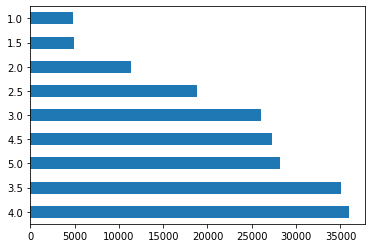

In [54]:
df.stars.value_counts().plot(kind="barh")

In [56]:
df.state.value_counts()

AZ     56686
NV     36312
ON     33412
NC     14720
OH     14697
PA     11216
QC      9219
AB      8012
WI      5154
IL      1932
SC      1162
NY        22
CA        19
TX         6
FL         4
XGM        4
WA         3
AL         3
CT         3
VA         2
VT         2
GA         2
AK         2
XWY        2
NE         2
BAS        1
AR         1
DOW        1
BC         1
NM         1
DUR        1
XGL        1
UT         1
NJ         1
TN         1
CON        1
Name: state, dtype: int64

In [57]:
df.to_csv("yelp_data.csv", index=False)